## Importing libraries and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
casino_full=pd.read_csv("datasets/Casino.csv",sep=";")
customer_full=pd.read_csv("datasets/Customer.csv",sep=";")
segments_full=pd.read_csv("datasets/Segments.csv",sep=",")
transactions_full=pd.read_csv("datasets/Transactions.csv",sep=",")

## Getting data ready for analysis. Filtering and merging

In [2]:
#We filter the segments DB for segment B
segments_B=segments_full[segments_full.Segment_Group=="B"]

In [3]:
#We choose only the casino transcactions of the customers
transactions_cas=transactions_full[transactions_full.Transaction_Product_Name =="Casino"]

In [4]:
#We restrict our DB only for the days of the campaign
casino_indate=casino_full[(casino_full['Casino_DateCreation_ID'] >= 20200125)&(casino_full['Casino_DateCreation_ID'] <= 20200204 )]

In [5]:
customer_casino=pd.merge(casino_indate,customer_full,left_on="Casino_Customer_ID",right_on="Customer_ID",how="inner")

In [6]:
customer_casino["Casino_Created"]=pd.to_datetime(customer_casino["Casino_Created"])
customer_casino["Customer_Birthday_Date"]=pd.to_datetime(customer_casino["Customer_Birthday_Date"])

In [7]:
#We compute the required Age of the customer when he registers for casino
customer_casino['Age'] = customer_casino["Casino_Created"] - customer_casino["Customer_Birthday_Date"]
customer_casino['Age']=customer_casino['Age']/np.timedelta64(1,'Y')

In [8]:
#Selecting the campaign target group
customer_casino=customer_casino[(customer_casino['Age'].round() >=25.0)&(customer_casino['Age'].round() <=40.0)]
customer_casino['Age']=customer_casino['Age'].round()

In [9]:
#We filter the tranascation only for the days of the campaign
transactions_cas=transactions_cas.drop(columns="Transaction_Product_Name")
transactions_cas=transactions_cas[(transactions_cas['Transaction_DateCreation_ID'] >= 20200125)&(transactions_cas['Transaction_DateCreation_ID'] <= 20200204 )]

In [10]:
customer_casino_trans=pd.merge(customer_casino,transactions_cas,left_on="Casino_Customer_ID",right_on="Customer_ID",how="inner")
customer_casino_trans=customer_casino_trans.drop(columns=['Customer_ID_x',"Customer_ID_y"])
casino_rd=pd.merge(customer_casino_trans,segments_B,left_on="Casino_Customer_ID",right_on="Customer_ID",how="inner")
casino_rd=casino_rd.drop(columns=['Unnamed: 13','Segment_Group'])

In [11]:
# Compute Gross Revenue as an important KPI
casino_rd["Gross_Revenue"]=casino_rd["Casino_Turnover"]-casino_rd["Casino_Winnings"]

In [12]:
casino_rd1=casino_rd[['Casino_ID', 'Casino_Created',"Casino_DateCreation_ID",
       'Casino_Customer_ID',"Gross_Revenue", 'Casino_Turnover', 'Casino_Winnings',"Age",'Casino_GameCode_Category','Transaction_DateCreation_ID', 'Transaction_Amount',"Customer_DateCreation_ID"]]

In [13]:
casino_rd1.isnull().sum()
Dates=["25-01-20","26-01-20","27-01-20","28-01-20","29-01-20","30-01-20","31-01-20","01-02-20","02-02-20","03-02-20","04-02-20"]

## KPI analysis

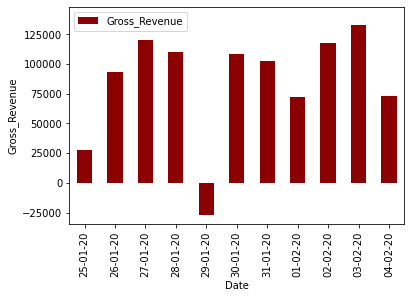

In [14]:
ax=casino_rd1.groupby(["Casino_DateCreation_ID"]).sum("Gross_Revenue").plot(y="Gross_Revenue",kind="bar",color="darkred")
ax.set_xticklabels(Dates) 
ax.set_ylabel("Gross_Revenue")
ax.set_xlabel("Date")
ax.set_ylim(ymax=148000)
#plt.savefig("GR_VS_DATE.jpg",bbox_inches='tight',dpi=400)
plt.show()

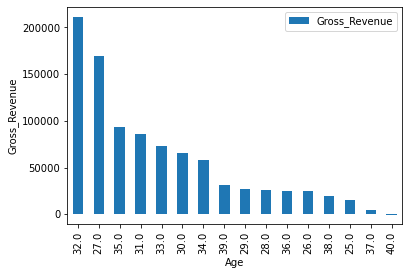

In [15]:
ax=casino_rd1.groupby(["Age"]).sum("Gross_Revenue").sort_values(by="Gross_Revenue",ascending=False).plot(y="Gross_Revenue",kind="bar")
ax.set_ylabel("Gross_Revenue")
ax.set_xlabel("Age")
#plt.savefig("GR_VS_AGE.jpg",bbox_inches='tight',dpi=400)
plt.show()

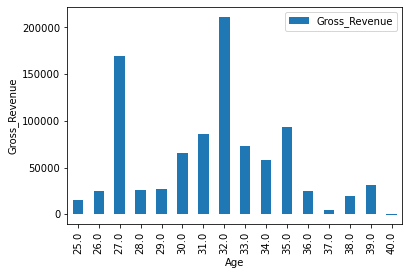

In [16]:
ax=casino_rd1.groupby(["Age"]).sum("Gross_Revenue").plot(y="Gross_Revenue",kind="bar")
ax.set_ylabel("Gross_Revenue")
ax.set_xlabel("Age")
#plt.savefig("GR_VS_AGE_2.jpg",bbox_inches='tight',dpi=400)
plt.show()

C:\Users\dimos\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


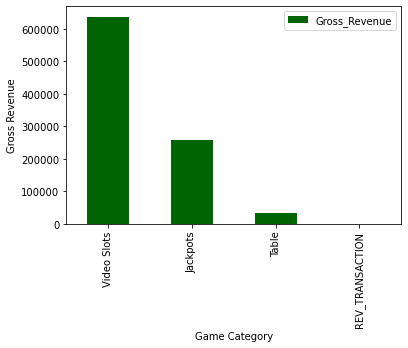

In [17]:
casino_rd1["Casino_GameCode_Category"].replace(to_replace = ['REVERSAL_TRANSACTION'], value = ["REV_TRANSACTION"], inplace= True)
ax=casino_rd1.groupby(["Casino_GameCode_Category"]).sum("Gross_Revenue").sort_values(by="Gross_Revenue",ascending=False).plot(y="Gross_Revenue",kind="bar",color="darkgreen")
ax.set_ylabel("Gross Revenue")
ax.set_xlabel("Game Category")
#plt.savefig("GR_VS_GAMES.jpg",bbox_inches='tight',dpi=400)
plt.show()

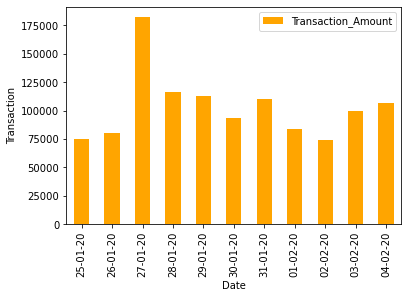

In [18]:
ax=casino_rd1.groupby(["Casino_DateCreation_ID"]).sum(["Transaction_Amount"]).plot(y="Transaction_Amount",kind="bar",color="orange")
ax.set_xticklabels(Dates) 
ax.set_ylabel("Transaction")
ax.set_xlabel("Date")
#plt.savefig("TR_VS_DATE.jpg",bbox_inches='tight',dpi=400)
plt.show()

In [19]:
casino_rd1=casino_rd1[(casino_rd1["Customer_DateCreation_ID"] >= 20200125)&(casino_rd1["Customer_DateCreation_ID"] <= 20200204 )]

In [20]:
count=list(casino_rd1.value_counts("Customer_DateCreation_ID",sort = False))

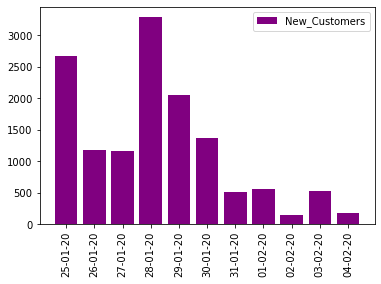

In [21]:
plt.bar(Dates,count,color="purple",label='New_Customers')
plt.xticks(rotation=90)
#plt.savefig("Customers_VS_DATE.jpg",bbox_inches='tight',dpi=400)
plt.legend()
plt.show()

## Campaign Evaluation

In [22]:
# we will create a new dataset with 3 time periods. Several days before the campaign, the campaign and several days after. we will restrict to segment B and 25-40

In [23]:
casino_3periods=casino_full[(casino_full['Casino_DateCreation_ID'] >= 20200114)&(casino_full['Casino_DateCreation_ID'] <= 20200215 )]

In [24]:
customer_casino3=pd.merge(casino_3periods,customer_full,left_on="Casino_Customer_ID",right_on="Customer_ID",how="inner")

customer_casino3["Casino_Created"]=pd.to_datetime(customer_casino3["Casino_Created"])
customer_casino3["Customer_Birthday_Date"]=pd.to_datetime(customer_casino3["Customer_Birthday_Date"])

#We compute the required Age of the customer when he registers for casino
customer_casino3['Age'] = customer_casino3["Casino_Created"] - customer_casino3["Customer_Birthday_Date"]
customer_casino3['Age']=customer_casino3['Age']/np.timedelta64(1,'Y')

#Selecting the campaign target group
customer_casino3=customer_casino3[(customer_casino3['Age'].round() >=25.0)&(customer_casino3['Age'].round() <=40.0)]
customer_casino3['Age']=customer_casino3['Age'].round()

#We filter the tranascation only for the days of the campaign
transactions_cas3=transactions_cas[(transactions_cas['Transaction_DateCreation_ID'] >= 20200114)&(transactions_cas['Transaction_DateCreation_ID'] <= 20200215 )]

In [25]:
customer_casino_trans3=pd.merge(customer_casino3,transactions_cas3,left_on="Casino_Customer_ID",right_on="Customer_ID",how="inner")
customer_casino_trans3=customer_casino_trans3.drop(columns=['Customer_ID_x',"Customer_ID_y"])
casino_rd3=pd.merge(customer_casino_trans3,segments_B,left_on="Casino_Customer_ID",right_on="Customer_ID",how="inner")
casino_rd3=casino_rd3.drop(columns=['Unnamed: 13','Segment_Group'])

In [26]:
# Compute Gross Revenue as an important KPI
casino_rd3["Gross_Revenue"]=casino_rd3["Casino_Turnover"]-casino_rd3["Casino_Winnings"]

casino_rd3p=casino_rd3[['Casino_ID', 'Casino_Created',"Casino_DateCreation_ID",
       'Casino_Customer_ID',"Gross_Revenue", 'Casino_Turnover', 'Casino_Winnings',"Age",'Casino_GameCode_Category','Transaction_DateCreation_ID', 'Transaction_Amount',"Customer_DateCreation_ID"]]

casino_rd3p.isnull().sum()

Casino_ID                      0
Casino_Created                 0
Casino_DateCreation_ID         0
Casino_Customer_ID             0
Gross_Revenue                  0
Casino_Turnover                0
Casino_Winnings                0
Age                            0
Casino_GameCode_Category       0
Transaction_DateCreation_ID    0
Transaction_Amount             0
Customer_DateCreation_ID       0
dtype: int64

In [27]:
DatesBefore=["16-01-20","17-01-20","18-01-20","19-01-20","20-01-20","21-01-20","22-01-20","23-01-20","24-01-20"]
DatesDuring=["25-01-20","26-01-20","27-01-20","28-01-20","29-01-20","30-01-20","31-01-20","01-02-20","02-02-20","03-02-20","04-02-20"]
DatesAfter=["05-02-20","06-02-20","07-02-20","08-02-20","09-02-20","10-02-20","11-02-20","12-02-20","13-02-20","14-02-20","15-02-20"]
DatesUntil=["14-01-20","15-01-20","16-01-20","17-01-20","18-01-20","19-01-20","20-01-20","21-01-20","22-01-20","23-01-20","24-01-20","25-01-20","26-01-20","27-01-20","28-01-20","29-01-20","30-01-20","31-01-20","01-02-20","02-02-20","03-02-20","04-02-20"]
zero_index=["14-01-20","15-01-20"]
DatesFull=DatesBefore+DatesDuring+DatesAfter+zero_index

In [28]:
casino_rd3p_newcust=casino_rd3p[(casino_rd3p["Customer_DateCreation_ID"] >= 20200114)&(casino_rd3p["Customer_DateCreation_ID"] <=  20200215 )]
count3=list(casino_rd3p_newcust.value_counts("Customer_DateCreation_ID",sort = False))

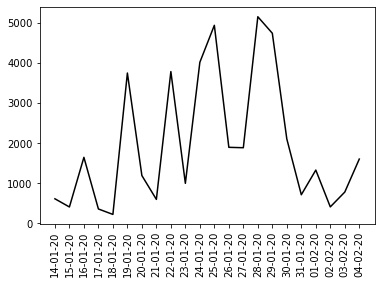

In [29]:
plt.plot(DatesUntil,count3,color="black",label='New_Customers')
plt.xticks(rotation=90)
ax.set_ylabel("New Customers")
ax.set_xlabel("Date")
plt.savefig("Customers_VS_DATE_before.jpg",bbox_inches='tight',dpi=400)
plt.show()

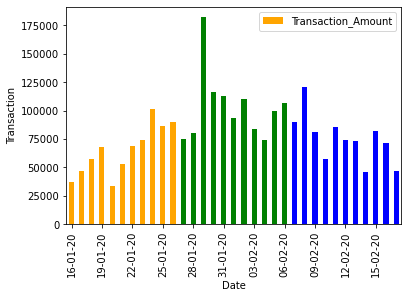

In [30]:
before=["orange"]*11
during=["green"]*11
after=['blue']*11
COLORS = before+during+after
ax=casino_rd3p.groupby(["Casino_DateCreation_ID"]).sum(["Transaction_Amount"]).plot(y="Transaction_Amount",kind="bar",color=COLORS)
ax.set_xticklabels(DatesFull)
ax.set_xticks(ax.get_xticks()[::3])
ax.set_ylabel("Transaction")
ax.set_xlabel("Date")
#plt.savefig("TR_VS_DATE_full.jpg",bbox_inches='tight',dpi=400)
plt.show()

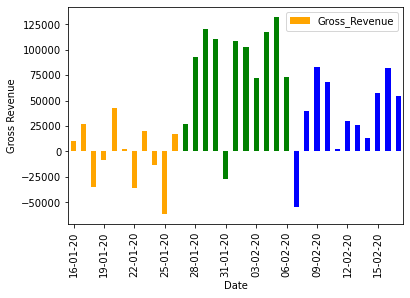

In [31]:
ax=casino_rd3p.groupby(["Casino_DateCreation_ID"]).sum("Gross_Revenue").plot(y="Gross_Revenue",kind="bar",color=COLORS)
ax.set_xticklabels(DatesFull)
ax.set_xticks(ax.get_xticks()[::3])
ax.set_ylabel("Gross Revenue")
ax.set_xlabel("Date")
#plt.savefig("GR_VS_DATE_full.jpg",bbox_inches='tight',dpi=400)
plt.show()